In [3]:
import numpy as np
import h5py
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [33]:
def plotNeuronalDistribution(path):
    '''
    Given the path to a network folder 'Snudda/networks/XXXXX'
    Plots 2 pie charts representing the neuron type distribution
    
    '''
    
    file_path = path + '/network-neuron-positions.hdf5'
    
    with h5py.File(file_path, 'r') as file:
        neurons = (file.get('network')).get('neurons')
        neuronID = np.array(neurons.get('neuronID'))
        morphology = np.array(neurons.get('morphology'))
    

    neuron_type = []

    for i in range (0, morphology.size) :
        neuron_type.append(str(morphology[i]))

#maybe this loop can be erased, if it is going to make the process lengthy (finding and replacing every neuron).
#we can leave the neuron_type as is, with the long doc path, and just change the name at the end, for printing
    for i in range (0, len(neuron_type)):
        if "dspn" in neuron_type[i]:
            neuron_type[i] = "DSPN"
        elif ('ispn' in neuron_type[i]) :
            neuron_type[i] = "ISPN"
        elif 'lts' in neuron_type[i] :
            neuron_type[i] = "LTS"
        elif 'fs' in neuron_type[i] :
            neuron_type[i] = "FS"
        elif 'chin' in neuron_type[i] :
            neuron_type[i] = "ChIN"
            
    structure_df = {'neuronID': neuronID, 'neuron_type': neuron_type}
    df = pd.DataFrame(data=structure_df)
    cond = (df['neuron_type'] == 'LTS') | (df['neuron_type'] == 'FS') | (df['neuron_type'] == 'ChIN')
    
    #df.mask(cond,'Interneurons')['neuron_type'].value_counts().plot(kind='pie').plot(kind='pie')
       
    #i tried to make this plot in one line only but didnt figure out how
    df_interneurons = df[cond]
    #df_interneurons['neuron_type'].value_counts().plot(kind='pie')
    

    fig = plt.figure()

    ax = fig.add_subplot(1,2,1) # 2,1,1 means: 2:two rows, 1: one column, 1: first plot
    graph_1 = df.mask(cond,'Interneurons')['neuron_type'].value_counts().plot(kind='pie').plot(kind='pie')

    ax2 = fig.add_subplot(1,2,2) # 2,1,2 means: 2:two rows, 1: one column, 1: second plot
    graph_2 = df_interneurons['neuron_type'].value_counts().plot(kind='pie')
    return()

()

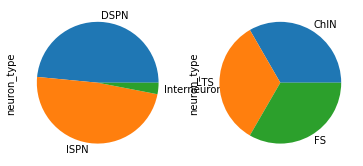

In [34]:
plotNeuronalDistribution('Snudda/networks/tinySim')

In [ ]:
def plotTraces(path):
    '''
    Given the path to a network folder 'Snudda/networks/XXXXX'
    Plots the traces of randomly selected neurons of each type
    
    '''
    
    file_path = path + '/simulation/volt.txt'
    
    with open(file_path, 'r') as file:
        volt = file.readlines()

    time = np.array(volt[0].split(","),float)
    volt = volt[1:]
    volt_2 =[]
    for i in range(0,len(volt)):
        volt_2.append(np.array(volt[i].split(","),float))
    print(volt_2[0])

    fig = plt.figure()

    ax = fig.add_subplot(1,2,1) # 2,1,1 means: 2:two rows, 1: one column, 1: first plot
    graph_1 = df.mask(cond,'Interneurons')['neuron_type'].value_counts().plot(kind='pie').plot(kind='pie')

    ax2 = fig.add_subplot(1,2,2) # 2,1,2 means: 2:two rows, 1: one column, 1: second plot
    graph_2 = df_interneurons['neuron_type'].value_counts().plot(kind='pie')
    return()

In [ ]:
def plotRaster(path):
    '''
    Given the path to a network folder 'Snudda/networks/XXXXX'
    Plots the traces of randomly selected neurons of each type
    
    '''
    
    file = path + '/simulation/network-output-spikes-666.txt'
    
    with open("Snudda/networks/tinySim/simulation/volt.txt", 'r') as volt_txt:
        volt = volt_txt.readlines()

    time = np.array(volt[0].split(","),float)
    volt = volt[1:]
    volt_2 =[]
    for i in range(0,len(volt)):
        volt_2.append(np.array(volt[i].split(","),float))
    print(volt_2[0])

    fig = plt.figure()

    ax = fig.add_subplot(1,2,1) # 2,1,1 means: 2:two rows, 1: one column, 1: first plot
    graph_1 = df.mask(cond,'Interneurons')['neuron_type'].value_counts().plot(kind='pie').plot(kind='pie')

    ax2 = fig.add_subplot(1,2,2) # 2,1,2 means: 2:two rows, 1: one column, 1: second plot
    graph_2 = df_interneurons['neuron_type'].value_counts().plot(kind='pie')
    return()